# Clustering example

In [1]:
import cluster
import os

### Path to the data

In [2]:
CoinNet = 'ResNet_Test1.h5'
data_path = 'Combined'

### Load the data and extract the features  


If labeled is True, labels will be created which correspond to the structure of image_dir. 

Otherwise no labels will be created. 

If extract_features is True, the feature will be extracted by the given cnn.

In [3]:
CoinCluster = cluster.Clustering(image_dir = data_path ,labeled=True,
                                  extract_features=True,cnn=CoinNet)

  9%|▉         | 1/11 [00:00<00:01,  6.18it/s]

Loading data with label:


  0%|          | 0/328 [00:00<?, ?it/s]

Extracting features:


100%|██████████| 328/328 [00:16<00:00, 20.24it/s]


#### Saving extracted feature
You can save the extracted features or load some extracted features. 

In [4]:
save_path = 'ex_feature'
CoinCluster.save_ex_features(save_path)
# CoinCluster.load_ex_features(Load_path)  

### Creating K-means Clustering
For the keyword arguments see https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html .

In [5]:
CoinCluster.create_KMeansClustering(n_clusters = 11 , random_state =1)


100%|██████████| 328/328 [00:00<00:00, 511804.95it/s]

Creating the overviews
Homogeneity:  0.9013207467324963
Compltness:  0.9055839972529447
V Measure:  0.9034473425895212


You can evaluate the Clustering on s subset of the labels.

In [6]:
subset = os.listdir(data_path)[:-5]
CoinCluster.eval_on_set(subset)

Scores on the Labels:  ['D', 'I', 'S', 'B', 'L', 'F'] 
 Homogenity Score:  0.8938599839546857 
 Completness Score:  0.8983118956142242 
 v_measure:  0.8960804103155322 



### Show Cluster or show the distribution of the ground truth labels
plot_overview(x) shows an overview of a Cluster x.

plot_all_overview() shows all Cluster in one plot.

plot_location(x) shows the location of x in the Clustering.

plot_all_overview() shows all locations in one plot.

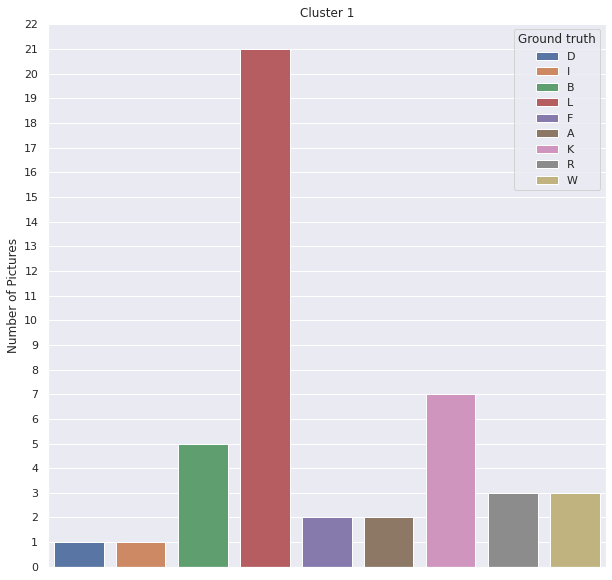

In [7]:
CoinCluster.plot_overview('1',ylabel_size=1)

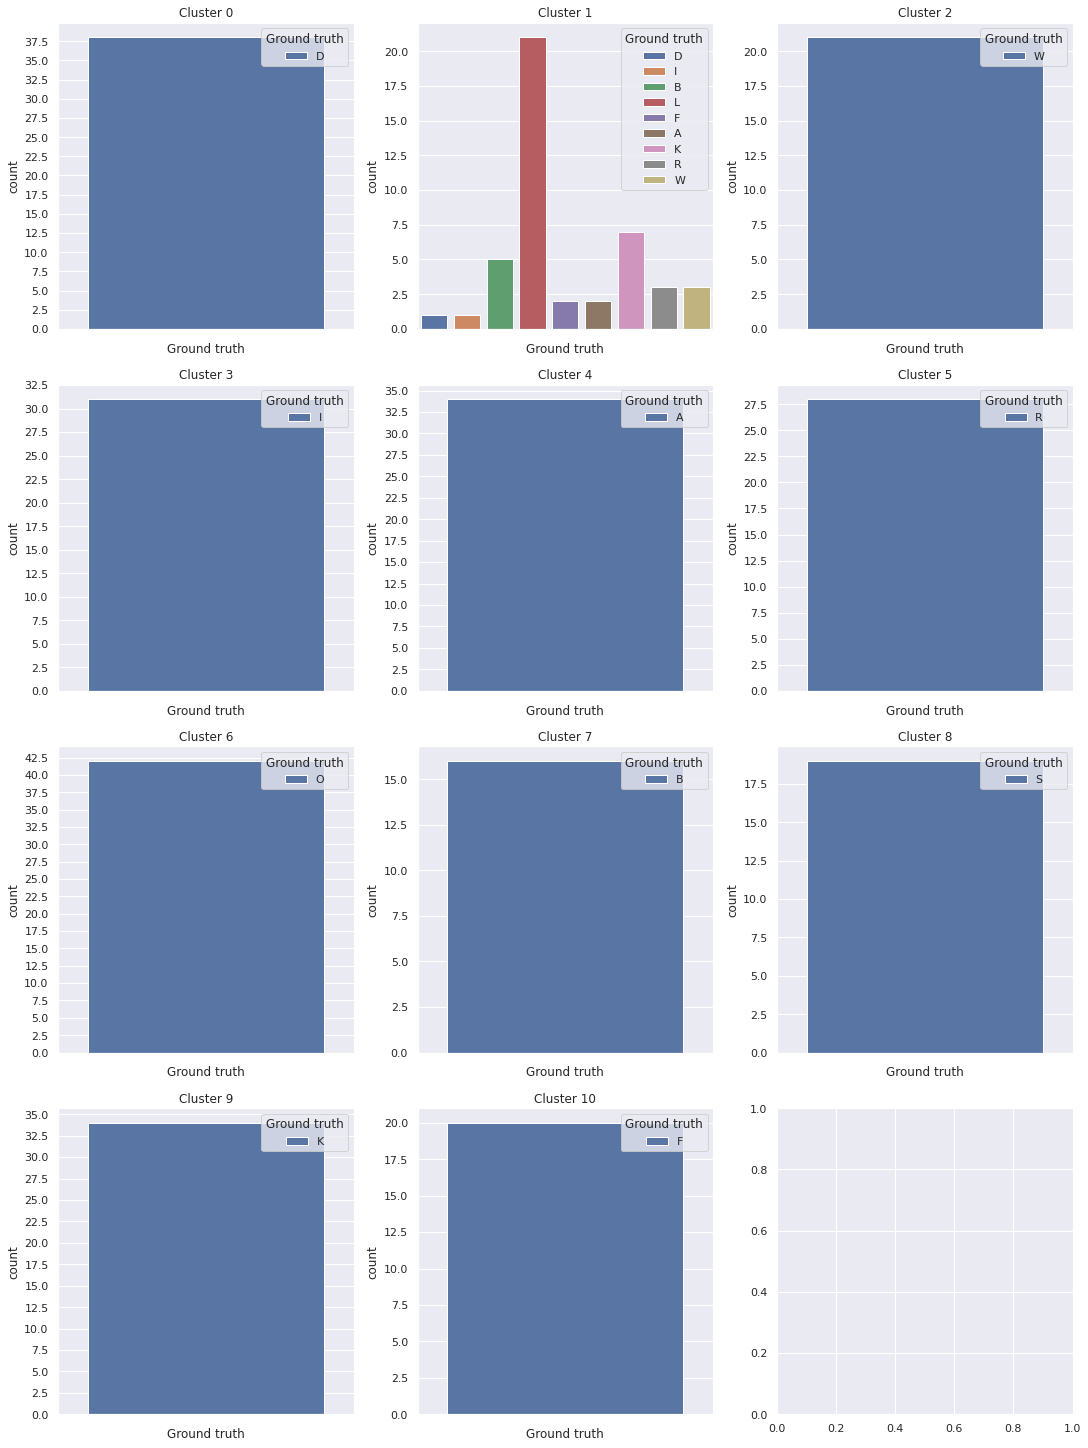

In [8]:
CoinCluster.plot_all_overview(pics_per_row=3)

In [9]:
CoinCluster.plot_location('K')

### Overviews in tabular form

In [10]:
CoinCluster.cluster_overview

Name Cluster Ground truth  Anzahl
0    CATII-H-05163A.jpg       0            D       1
1    CATII-H-12029A.jpg       0            D       1
2    CATII-H-18956A.jpg       0            D       1
3    CATII-H-11652A.jpg       0            D       1
4    CATII-H-14040A.jpg       0            D       1
..                  ...     ...          ...     ...
323  CATII-H-16531A.jpg       6            O       1
324  CATII-H-14521A.jpg       6            O       1
325  CATII-H-23108A.jpg       6            O       1
326  CATII-H-17655A.jpg       6            O       1
327  CATII-H-18278A.jpg       6            O       1

[328 rows x 4 columns]

In [11]:
CoinCluster.groupby_ground_truth

Anzahl
Ground truth Cluster        
A            1             2
             4            34
B            1             5
             7            16
D            0            38
             1             1
F            1             2
             10           20
I            1             1
             3            31
K            1             7
             9            34
L            1            21
O            6            42
R            1             3
             5            28
S            8            19
W            1             3
             2            21

In [12]:
CoinCluster.groupby_Stempel

Anzahl
Cluster Ground truth        
0       D                 38
1       A                  2
        B                  5
        D                  1
        F                  2
        I                  1
        K                  7
        L                 21
        R                  3
        W                  3
10      F                 20
2       W                 21
3       I                 31
4       A                 34
5       R                 28
6       O                 42
7       B                 16
8       S                 19
9       K                 34

## Saving cluster

save_cluster creates a folder with the clustering structure.
 
If  save_data is True, raw_data, true_labels and ex_features will also be saved at   destination_data. Also a csv file with the information of cluster_overview will be saved at destination_data.

In [13]:
save_path = 'Kmeans_clustering'
CoinCluster.save_cluster(destination_cluster= save_path
                         , destination_data='/tmp', save_data=False)

100%|██████████| 328/328 [00:00<00:00, 705.80it/s]


 write_csv creates a csv file with the information of cluster_overview.

In [14]:
CoinCluster.write_csv(save_name='Kmeans_clustering.csv')

100%|██████████| 328/328 [00:00<00:00, 114644.31it/s]


### Extracted feature can be visualized.
true_label=True for true labels.

true_label=False for Cluster labels.


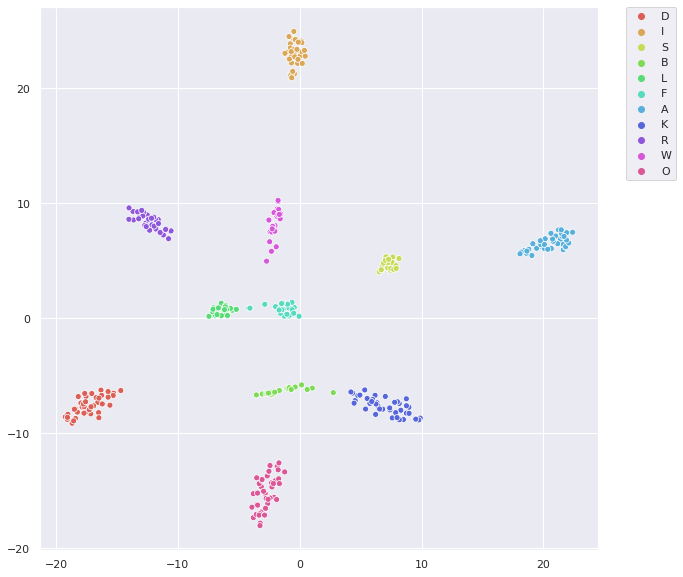

In [15]:
CoinCluster.visual_data(true_label=True)

In [16]:
CoinCluster.visual_data(true_label=False)

## Hierarchical Clustering

First steps similiar to the previous example.

In this example the extracted features are loaded.

In [17]:
CoinHierarch = cluster.Clustering(image_dir = data_path ,labeled=True,
                                  extract_features=False,cnn=CoinNet)
CoinHierarch.load_ex_features('ex_feature.npy')


  9%|▉         | 1/11 [00:00<00:01,  6.67it/s]

Loading data with label:


100%|██████████| 11/11 [00:01<00:00,  8.19it/s]


In [18]:
CoinHierarch.create_AgglomerativeClustering(n_cluster=11)

100%|██████████| 328/328 [00:00<00:00, 471625.54it/s]

Creating the overviews
Homogeneity:  0.9204802661213678
Compltness:  0.9272567385710602
V Measure:  0.9238560761787602


### Dendrogram Plots
Keyword arguments see https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html .

truncate_mode='lastp'  number of cluster.

x-axis number of picture in the cluster.

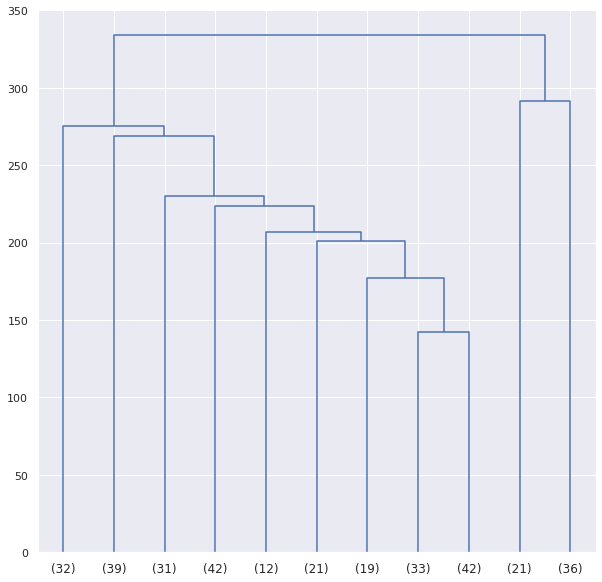

In [19]:
CoinHierarch.plot_dendrogram(color_threshold=0,truncate_mode='lastp', p=11)

### Example Dendrogram with 15 Cluster

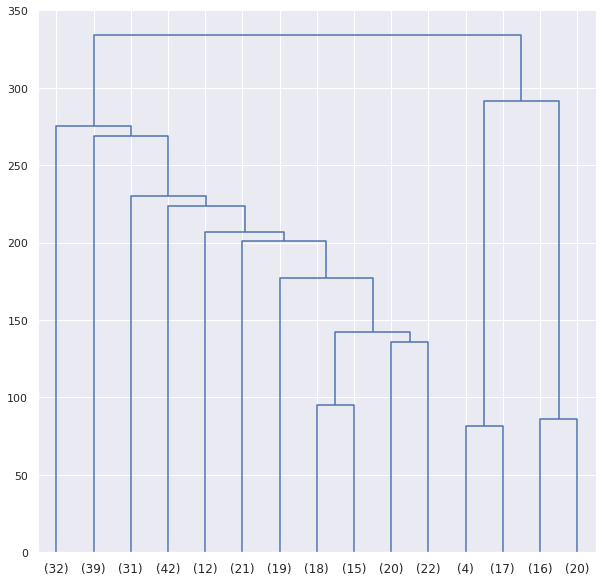

In [20]:
CoinHierarch.plot_dendrogram(color_threshold=0,truncate_mode='lastp', p=15)

### Plot with Cluster labels

only available with cluster size

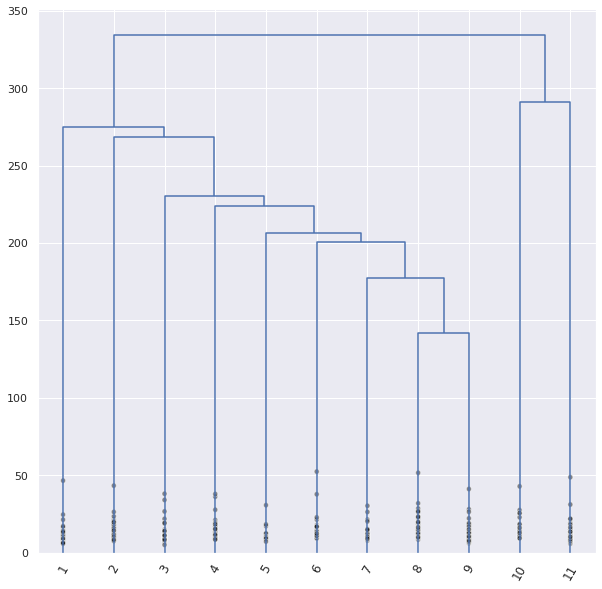

In [21]:
CoinHierarch.plot_cluster_dendrogram()

#### Change cluster size

In [22]:
CoinHierarch.create_AgglomerativeClustering(n_cluster=15)

100%|██████████| 328/328 [00:00<00:00, 605782.35it/s]

Creating the overviews
Homogeneity:  0.9738453715210307
Compltness:  0.8814284591144151
V Measure:  0.9253351295765188


In [23]:
CoinHierarch.plot_cluster_dendrogram()

#### All functions of Kmeans Clustering  are also usable with hierarchical clustering!

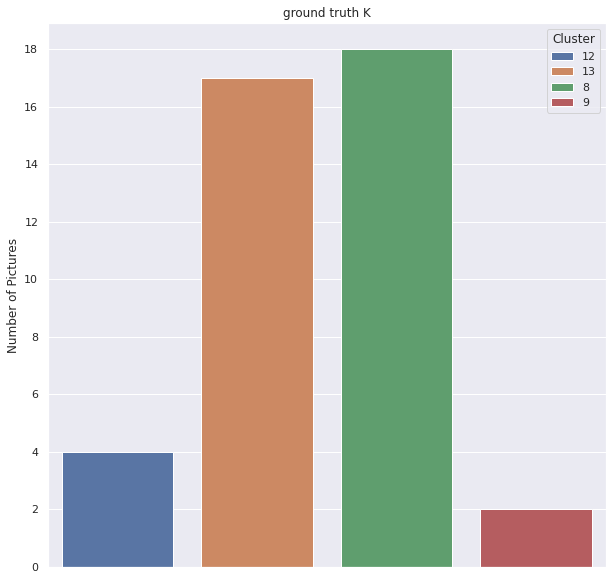

In [24]:
CoinHierarch.plot_location('K')